# Jupyter Notebook 3: Disentanglement Scores, Latent Space Plots
## Dentate Gyrus Dataset

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sys
import util_loss as ul
#import the package to use
import beta_vae_5
from dentate_features import *
from all_obs_linear_classifier_package import *
import os,glob

In [ ]:
data = sc.read("./data/dentate_gyrus_normalized.h5ad")

#Adding more features
data.obs["seq_depth"] = np.sum(data.X,axis=1)
data.obs["exp_gene"] = np.count_nonzero(data.X.toarray(),axis=1)

min_dep = min(data.obs['seq_depth'])
data.obs["seq_depth"] = data.obs["seq_depth"] - min_dep
fac_seq = max(data.obs["seq_depth"])/10
data.obs['seq_depth'] = data.obs["seq_depth"]/fac_seq
data.obs['seq_depth'] = data.obs['seq_depth'].astype('int64')
data.obs['seq_depth'] = np.where(data.obs['seq_depth']==10, 9,data.obs['seq_depth'])

min_exp = min(data.obs['exp_gene'])
data.obs["exp_gene"] = data.obs["exp_gene"] - min_exp
fac_exp = max(data.obs["exp_gene"])/10
data.obs['exp_gene'] = data.obs["exp_gene"]/fac_exp
data.obs['exp_gene'] = data.obs['exp_gene'].astype('int64')
data.obs['exp_gene'] = np.where(data.obs['exp_gene']==10, 9,data.obs['exp_gene'])

print(data.obs)

In [ ]:
'''
Difference scores between features are calculated: 1st level
'''
# Restoring pre-trained models
os.chdir("/storage/groups/ml01/workspace/harshita.agarwala/models_dentate_1000epochs")
path = "latent5_alpha50_c30/"
scg_model = beta_vae_5.C_VAEArithKeras(x_dimension= data.shape[1],z_dimension=5,model_to_use=path,
                                       alpha=5,c_max=30)
scg_model.restore_model()
print(scg_model)

observation = "4_observation" #a name to identify the score files
L = 20 #number of samples in a batch
B = 2 #number of batches

try:
    os.makedirs(path+observation+"_disentangled_score/")
except OSError:
    print ("Check if path %s already exists" % path)
else:
    print ("Successfully created the directory ", path+observation+"_disentangled_score/")

for i in range(5):
    df = feature_scores(model=scg_model,L=L,B=B,data=data)
    print(df)
    df.to_csv(path+observation+"_disentangled_score/matrix_all_dim"+str(i)+".csv",index=False)

In [ ]:
'''
Difference scores between features are are now classified
'''
os.chdir("/storage/groups/ml01/workspace/harshita.agarwala/models_dentate_1000epochs")
path = "latent5_alpha50_c30/"
observation="4_observation"
feature_classification(path=path,z_dim = 5,observation=observation)

<tf.Variable 'Variable:0' shape=() dtype=float32>
Model: "VAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 4739)              0         
_________________________________________________________________
encoder (Model)              (None, 5)                 4445610   
_________________________________________________________________
decoder (Model)              (None, 4739)              4446339   
Total params: 8,891,949
Trainable params: 8,885,549
Non-trainable params: 6,400
_________________________________________________________________
<tf.Variable 'Variable:0' shape=() dtype=float32>
Check if path latent5_alpha50_c30/cells_latent_clusters/ already exists


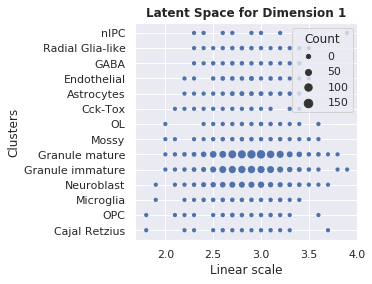

<Figure size 432x288 with 0 Axes>

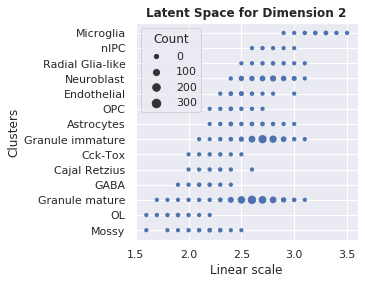

<Figure size 432x288 with 0 Axes>

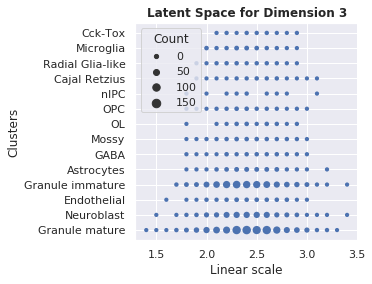

<Figure size 432x288 with 0 Axes>

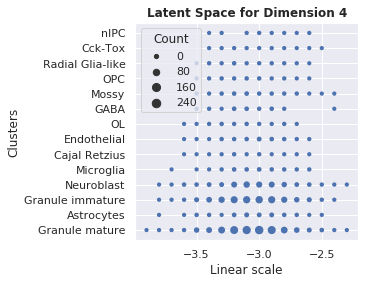

<Figure size 432x288 with 0 Axes>

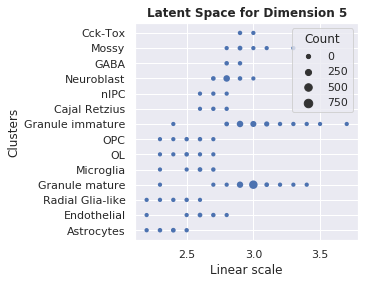

<Figure size 432x288 with 0 Axes>

In [12]:
'''
Creating latent space plots for each feature and also 
saving the latent space values for each feature
'''

from convert_to_latent_space import *

observations = ["age(days)","clusters","exp_gene","seq_depth"]
observations = ["clusters"]

os.chdir("/storage/groups/ml01/workspace/harshita.agarwala/models_dentate_1000epochs")
path = "latent5_alpha50_c30/"

scg_model = beta_vae_5.C_VAEArithKeras(x_dimension= data.shape[1],z_dimension=5,model_to_use=path,
                                       alpha=5,c_max=30)
scg_model.restore_model()

for obs in observations:    
    single_feature_to_latent(path=path,adata=data,feature=obs,model=scg_model,z_dim=5)
    os.chdir("/storage/groups/ml01/workspace/harshita.agarwala/models_dentate_1000epochs")

In [ ]:
'''
Difference scores within features are calculated: 2nd level
It depends on the function 'single_feature_to_latent' used in the previous section.
'''
from latent_space_scores import *
os.chdir("/storage/groups/ml01/workspace/harshita.agarwala/models_dentate_1000epochs")
path = "latent5_alpha50_c30/"

observation = "clusters" #feature name to identify the score files
L = 20 #number of samples in a batch
B = 2 #number of batches

data = pd.read_csv(path+"cells_latent_"+observation+"/cells_in_latent.csv",index_col = 0)
#print(data)

try:
    os.makedirs(path+observation+"_disentangled_score/")
except OSError:
    print ("Check if path %s already exists" % path)
else:
    print ("Successfully created the directory ", path+observation+"_disentangled_score/")

for i in range(2):
    df = latent_space_scores(L=L,B=B,data=data)
    print(df)
    df.to_csv(path+observation+"_disentangled_score/matrix_all_dim"+str(i)+".csv",index=False)

In [ ]:
'''
Latent Space scores within feature is now classified
'''
os.chdir("/storage/groups/ml01/workspace/harshita.agarwala/models_dentate_1000epochs")
path = "latent5_alpha50_c30/"

feature_classification(path=path,z_dim = 5,observation="clusters") #keep changing the observation

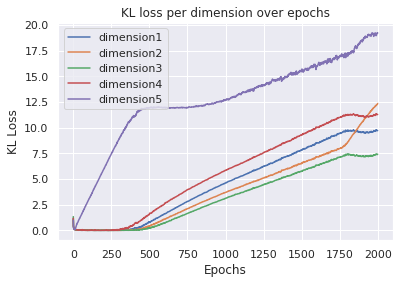

In [11]:
'''
Plot KL Divergence per dimension over epochs
'''
from kl_divergence_plot import *

os.chdir("/storage/groups/ml01/workspace/harshita.agarwala/models_dentate_1000epochs")
path = "latent5_alpha50_c30/"
plot_kl_loss(path=path,z_dim=5)
